In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
iris = pd.read_csv("IRIS.CSV")
features = iris.values[:,0:-1]

In [4]:
y = iris['species'].to_numpy()

In [5]:
#Use simple find and replace to convert the class labels to 1, 2, and 3 in the dataset
for i in range(len(y)):
    if y[i] == 'Iris-setosa':
        y[i] = '1'
    elif y[i] == 'Iris-versicolor':
        y[i] = '2'
    else:
        y[i] = '3'  

In [6]:
#Read the data and report mean and standard deviation for each column in the features (4 features)
f1 = iris['sepal_length']
f2 = iris['sepal_width']
f3 = iris['petal_length']
f4 = iris['petal_width']
f1_mean = np.mean(f1.to_numpy())
f2_mean = np.mean(f2.to_numpy())
f3_mean = np.mean(f3.to_numpy())
f4_mean = np.mean(f4.to_numpy())
f1_sd = np.std(f1.to_numpy())
f2_sd = np.std(f2.to_numpy())
f3_sd = np.std(f3.to_numpy())
f4_sd = np.std(f4.to_numpy())
print('    Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width')
print('Mean   ', round(f1_mean,2), '       ', round(f2_mean,2), '      ', round(f3_mean,2), '        ',round(f4_mean,2) )
print('Std    ', round(f1_sd,2), '       ', round(f2_sd,2), '      ', round(f3_sd,2), '        ',round(f4_sd,2) )

    Sepal Length Sepal Width Petal Length Petal Width
Mean    5.84         3.05        3.76          1.2
Std     0.83         0.43        1.76          0.76


In [7]:
#Report the class distribution (i. e number of instances for each class)
c1 = 0
c2 = 0
c3 = 0
for i in range(len(y)):
    if y[i] == '1':
        c1+=1
    elif y[i] == '2':
        c2+=1
    else:
        c3+=1
print('Class 1:', c1)
print('Class 2:', c2)
print('Class 3:', c3)

Class 1: 50
Class 2: 50
Class 3: 50


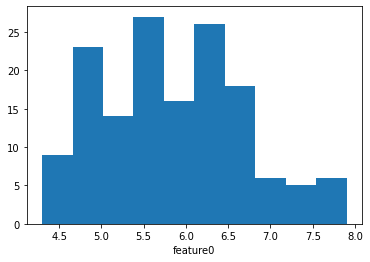

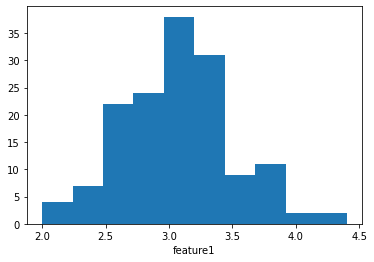

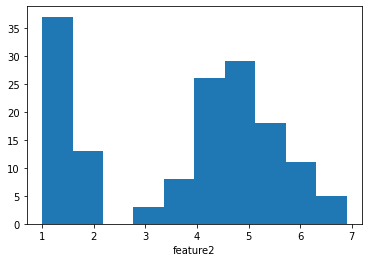

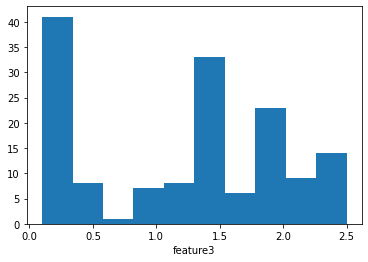

In [8]:
#Show histogram for each feature
#Note you need to use a single function/method that outputs the histogram with a given filename
#eg. feature1.png which is given as a parameter to the function
#A for loop should be used to call the function/method
num_of_features = iris.shape[1] - 1
def histogram(name, feature):
    plt.hist(feature) 
    plt.xlabel(name)
    plt.savefig(f'{name}.png')
    plt.show()
for i in range(num_of_features):
    name = 'feature'+ str(i)
    data = features[:,i]
    histogram(name, data)

In [9]:
#Split data into a train and test. Use 60 percent data in the training and test set which is assigned 
#i. randomly ii. assigned by the first 60 percent as train and the rest as test 
def random_data_split(x,y,portion):
    order = np.random.permutation(len(x))
    train_index = int(len(x)*portion)
    
    t = order[:train_index]
    x_train = x[t]
    y_train = y[t]
    t1 = order[train_index:]
    x_test = x[t1]
    y_test = y[t1]
    return x_train, x_test, y_train, y_test

def nonrandom_data_split(x, y, portion):
    i = int(len(x) * portion)
    x_train = x[:i]
    y_train = y[:i]
    x_test = x[i:]
    y_test = y[i:]
    return x_train, x_test, y_train, y_test
#random split using 60%
random_x_train, random_x_test, random_y_train, random_y_test = random_data_split(features, y, 0.6)
nonrandom_x_train, nonrandom_x_test, nonrandom_y_train, nonrandom_y_test = nonrandom_data_split(features, y, 0.6)

In [10]:
#Create a subset of the dataset where you consider only instances that feature class 1 or 2
#so that you treat this problem as a binary classification problem later
#i.e save it as binary_iristrain.txt and binary_iristest.txt.
#Carry out the stats and visuals in Step 6 for this dataset. 
subset1 = iris.values[iris.values[:, 4] == '1']
subset2 = iris.values[iris.values[:, 4] == '2']
subset = np.vstack((subset1, subset2))
sub_x_train, sub_x_test, sub_y_train, sub_y_test = random_data_split(subset[:, :-1], subset[:, -1], 0.6)
sub_train = np.hstack((sub_x_train, sub_y_train[:, np.newaxis]))
sub_test = np.hstack((sub_x_test, sub_y_test[:, np.newaxis]))

In [11]:
#Can you normalise the input features between [0 and 1]? 
def normalise(x):
    min_x = x.min(0) 
    max_x = x.max(0)
    normalised_x = (x - min_x) / (max_x - min_x)
    return normalised_x

In [12]:
normalised_output = normalise(features)

In [17]:
#Try developing a linear regression model for binary classification using the step transfer
#function using the data produced from Iris binary classification case. 
#Use 60 percent of data picked randomly for training and remaining for testing. 
def linear_regre(x,y,percent):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=percent, random_state=1)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return rmse, r_squared, y_pred
rmse_normalised, r_squred_normalised, y_pred = linear_regre(features, y, 0.4)

In [18]:
print('Mean Squared Error with Normalisetion: ', rmse_normalised)     
print('R2 Score with Normalisation:',r_squred_normalised)

Mean Squared Error with Normalisetion:  0.2416559409240553
R2 Score with Normalisation: 0.910119137399741


In [19]:
y_pred

array([0.64572678, 1.85061294, 2.12524649, 0.8807635 , 2.83898152,
       2.43276559, 2.71111337, 1.19356111, 1.06878519, 2.94979018,
       2.2724569 , 1.03596351, 2.87077268, 2.27685683, 2.37372564,
       1.03825957, 2.08792334, 2.49410162, 0.92897953, 0.82771079,
       2.32899775, 2.55135121, 2.46084319, 0.92794834, 2.76127999,
       2.2109089 , 0.82095476, 0.99455393, 2.28540256, 2.63357273,
       2.34597048, 2.86423823, 2.05668898, 2.94299266, 3.05216291,
       0.88762038, 2.19997451, 0.85981479, 2.26352486, 2.7856664 ,
       2.80144706, 0.93812355, 2.52658808, 2.84607276, 2.15316254,
       3.15113107, 0.90040516, 0.92881798, 0.99461396, 2.31436324,
       0.92723959, 0.7410172 , 3.10024544, 2.73989905, 2.83142482,
       2.98679982, 2.55842074, 2.44691677, 2.95386317, 2.21765533])

In [20]:
y_pred_int = np.heaviside(y_pred, 1) 

In [21]:
y_pred_int

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])